In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from math import pow, atan, degrees, sqrt
mpl.rcParams['figure.dpi'] = 200

In [2]:
directory = './Data/Real Madrid UCL matches/'
files_list = ['RMA_SHD_xgoal_stats.json', 'SHD_EMA_xgoal_stats.json', 'RMA_SHE_xgoal_stats.json', 
              'INT_RMA_xgoal_stats.json', 'SHE_RMA_xgoal_stats.json', 'PSG_RMA_xgoal_stats.json',
              'RMA_INT_xgoal_stats.json', 'RMA_PSG_xgoal_stats.json']

In [3]:
# Use to calculate the angle between the shot location and two posts!
# def calculate_angle(x, y):
    
#     near_post_y = 44.5 * 68 / 100
#     far_post_y = 55.5 * 68 / 100
    
#     x = (100 - x) * 105 / 100
    
#     y = abs(50 - y) * 68 / 100
    
#     opposite = (far_post_y - near_post_y) * x
#     adjacent = pow(x, 2) + pow(y, 2) - pow((far_post_y - near_post_y) / 2, 2)
    
#     if (x != 0):
#         theta = (180 + degrees(atan(opposite / adjacent))) % 180
#     else:
#         theta = (180 + degrees(atan(opposite / adjacent)))
    
#     return theta

In [4]:
def calculate_angle(x1, y1, x2, y2):
    isopposite = False
    
    if (y2 - y1 != 0):
    
        if (y1 > 50):
            isopposite = True
        else:
            isopposite = False
        
        if (x1 <= 50):
            x1 = x1 * 105 / 100
        else:
            x1 = (100 - x1) * 105 / 100
        
        if (x2 <= 50):    
            x2 = x2 * 105 / 100
        else:
            x2 = (100 - x2) * 105 / 100

        y1 = y1 * 68 / 100
        y2 = y2 * 68 / 100
        
        opposite = x1
        adjacent = sqrt(pow(y2 - y1, 2)) + pow(x2, 2)
        theta = (180 + degrees(atan(opposite / adjacent))) % 180
        
        if (isopposite == True):
            theta = 90 + (90 - theta)
        
    if (y2 - y1 == 0):
        theta = y1 * 1.8
    
    return theta

In [5]:
theta_angle = calculate_angle(88.5, 50, 100, 50)
print(theta_angle)

90.0


In [6]:
shots = pd.DataFrame()

shot_event = {
    'shotType': 0,
    'playerName': '',
    'fromX': 0,
    'fromY': 0,
    'gkSaved': 0,
    'xGOT': 0,
    'shotAngle': 0
}

for file in files_list:
    
    with open(directory + file, encoding = 'utf-8') as jsonFile:
        jsonData = json.load(jsonFile)
        jsonFile.close()
        
    liveData = jsonData['liveData']
    event = liveData['event']
    
    for shot in event:
        
        if ('contestantId' in shot) and (shot['contestantId'] != "3kq9cckrnlogidldtdie2fkbl"):
        
            if (shot['typeId'] == 15) or (shot['typeId'] == 16):
                
                isqualifier = False
                
                for qualifier in shot['qualifier']:
                    
                    if ('qualifierId' in qualifier):
                        
                        if (qualifier['qualifierId'] != 82):
                            isqualifier = False
                        else:
                            isqualifier = True
                            break
                        
                if (isqualifier == False):
                    
                    shot_event['shotType'] = shot['typeId']
                    shot_event['playerName'] = shot['playerName']
                    shot_event['fromX'] = shot['x']
                    shot_event['fromY'] = shot['y']
                    
                    if (shot['typeId'] == 15):
                        shot_event['gkSaved'] = 1
                    else:
                        shot_event['gkSaved'] = 0
                        
                    shot_event['shotAngle'] = calculate_angle(float(shot['x']), float(shot['y']), 100, 50)
                    
                    for qualifier in shot['qualifier']:
                        
                        if ('qualifierId' in qualifier):
                            
                            if (qualifier['qualifierId'] == 322):
                                shot_event['xGOT'] = qualifier['value']
                            
                    shots = shots.append(shot_event, ignore_index = True)
        
shots

,shotType,playerName,fromX,fromY,gkSaved,xGOT,shotAngle
0,15.0,M. Mudryk,75.4,49.7,1.0,0.0307,89.547499
1,16.0,Fernando,89.3,46.6,0.0,0.5304,78.371690
2,15.0,Fernando,88.6,63.9,1.0,0.5736,128.296060
3,15.0,Tetê,80.5,29.9,1.0,0.0176,56.275075
4,15.0,H. Sudakov,80.1,72.1,1.0,0.0404,125.724259
5,16.0,S. Kryvtsov,18.7,53.4,0.0,0.0404,96.715593
6,15.0,Fernando,90.2,68.2,1.0,0.1459,140.258240
7,15.0,Fernando,91.3,63.0,1.0,0.1665,134.059764
8,15.0,Marlos,88.3,38.8,1.0,0.1473,58.203445
9,15.0,M. Mudryk,90.3,65.3,1.0,0.2425,135.609418


In [7]:
def divide(angle, divisions):
    degree = 180 / divisions
    division = ((angle + (degree / 2)) // degree)
    
    if division > angle:
        division = 1
  
    return division

In [8]:
def divide_pass_direction(row):
    return divide(row['shotAngle'], 9)

In [9]:
shots['division'] = shots.apply(divide_pass_direction, axis = 1)
shots

,shotType,playerName,fromX,fromY,gkSaved,xGOT,shotAngle,division
0,15.0,M. Mudryk,75.4,49.7,1.0,0.0307,89.547499,4.0
1,16.0,Fernando,89.3,46.6,0.0,0.5304,78.371690,4.0
2,15.0,Fernando,88.6,63.9,1.0,0.5736,128.296060,6.0
3,15.0,Tetê,80.5,29.9,1.0,0.0176,56.275075,3.0
4,15.0,H. Sudakov,80.1,72.1,1.0,0.0404,125.724259,6.0
5,16.0,S. Kryvtsov,18.7,53.4,0.0,0.0404,96.715593,5.0
6,15.0,Fernando,90.2,68.2,1.0,0.1459,140.258240,7.0
7,15.0,Fernando,91.3,63.0,1.0,0.1665,134.059764,7.0
8,15.0,Marlos,88.3,38.8,1.0,0.1473,58.203445,3.0
9,15.0,M. Mudryk,90.3,65.3,1.0,0.2425,135.609418,7.0


In [10]:
shots = shots.sort_values(['division', 'shotAngle', 'xGOT']).reset_index()
shots = shots.drop('index', axis = 1)
shots

,shotType,playerName,fromX,fromY,gkSaved,xGOT,shotAngle,division
0,15.0,E. Džeko,96.3,36.3,1.0,0.9835,22.637331,1.0
1,15.0,Lautaro Martínez,91.9,36.3,1.0,0.111,42.394375,2.0
2,16.0,J. Yaxshiboyev,92.5,40.7,0.0,0.7329,51.233877,3.0
3,15.0,Tetê,80.5,29.9,1.0,0.0176,56.275075,3.0
4,15.0,S. Thill,76.1,25.4,1.0,0.0387,56.313094,3.0
5,15.0,Marlos,88.3,38.8,1.0,0.1473,58.203445,3.0
6,15.0,K. Mbappé,93.2,44.5,1.0,0.1299,62.354025,3.0
7,16.0,S. Thill,78.5,34.1,0.0,0.6126,64.408521,3.0
8,15.0,E. Džeko,93.1,44.9,1.0,0.2046,64.420729,3.0
9,15.0,A. Traoré,86.6,41.0,1.0,0.1871,66.492501,3.0


In [101]:
save_sonar = pd.DataFrame()
previous_division = 0
saveTotal = 0
shotConceded = 0
totalxGOT = 0

save_stats = {
    'division': 0,
    'saveTotal': 0,
    'shotConceded': 0,
    'totalxGOT': 0,
    'goalsPrevented': 0
}

for i in range(len(shots)):
    
    if (i == 0):
        previous_division = float(shots['division'][i])
        saveTotal = shots['gkSaved'][i]
        shotConceded = 1 - saveTotal
        totalxGOT = float(shots['xGOT'][i])
        
    else:
                
        if (previous_division == float(shots['division'][i])):
                        
            totalxGOT = float(totalxGOT) + float(shots['xGOT'][i])
                        
            if (shots['gkSaved'][i] == 1):
                saveTotal = saveTotal + 1
            else:
                shotConceded = shotConceded + 1
                
            if (i == (len(shots) - 1)):
                                            
                save_stats['division'] = previous_division
                save_stats['saveTotal'] = saveTotal
                save_stats['shotConceded'] = shotConceded
                save_stats['totalxGOT'] = totalxGOT
                save_stats['goalsPrevented'] = round((float(totalxGOT) - int(shotConceded)) / (int(shotConceded) + int(saveTotal)), 2)
                save_sonar = save_sonar.append(save_stats, ignore_index = True)
                
        else:
                        
            save_stats['division'] = previous_division
            save_stats['saveTotal'] = saveTotal
            save_stats['shotConceded'] = shotConceded
            save_stats['totalxGOT'] = totalxGOT
            save_stats['goalsPrevented'] = round((float(totalxGOT) - int(shotConceded)) / (int(shotConceded) + int(saveTotal)), 2)
            save_sonar = save_sonar.append(save_stats, ignore_index = True)
            
            previous_division = shots['division'][i]
            saveTotal = shots['gkSaved'][i]
            shotConceded = 1 - saveTotal
            totalxGOT = shots['xGOT'][i]
        
save_sonar

,division,saveTotal,shotConceded,totalxGOT,goalsPrevented
0,1.0,1.0,0.0,0.9835,0.98
1,2.0,1.0,0.0,0.111,0.11
2,3.0,6.0,2.0,2.0707,0.01
3,4.0,7.0,1.0,1.0936,0.01
4,5.0,6.0,1.0,1.4625,0.07
5,6.0,5.0,1.0,1.3849,0.06
6,7.0,4.0,0.0,0.5791,0.14
7,8.0,2.0,1.0,0.5915,-0.14


In [112]:
if (min(save_sonar['goalsPrevented']) < 0):
    save_sonar = save_sonar.assign(goalsPreventedColour = save_sonar['goalsPrevented'] + min(save_sonar['goalsPrevented']) * -1)
else:
    save_sonar = save_sonar.assign(goalsPreventedColour = save_sonar['goalsPrevented'])    
        
save_sonar

,division,saveTotal,shotConceded,totalxGOT,goalsPrevented,goalsPreventedColour
0,1.0,1.0,0.0,0.9835,0.98,1.12
1,2.0,1.0,0.0,0.111,0.11,0.25
2,3.0,6.0,2.0,2.0707,0.01,0.15
3,4.0,7.0,1.0,1.0936,0.01,0.15
4,5.0,6.0,1.0,1.4625,0.07,0.21
5,6.0,5.0,1.0,1.3849,0.06,0.20
6,7.0,4.0,0.0,0.5791,0.14,0.28
7,8.0,2.0,1.0,0.5915,-0.14,0.00


In [12]:
robotoLight = fm.FontProperties(fname='./Roboto-Light.ttf')
robotoRegular = fm.FontProperties(fname='./Roboto-Regular.ttf')
robotoBold = fm.FontProperties(fname='./Roboto-Bold.ttf')

Text(5.75, 13, "Data via Opta\nBy Daryl - @dgouilard\nInspired by @BryanBastin & @nguyenank_'s original viz for ice hockey")

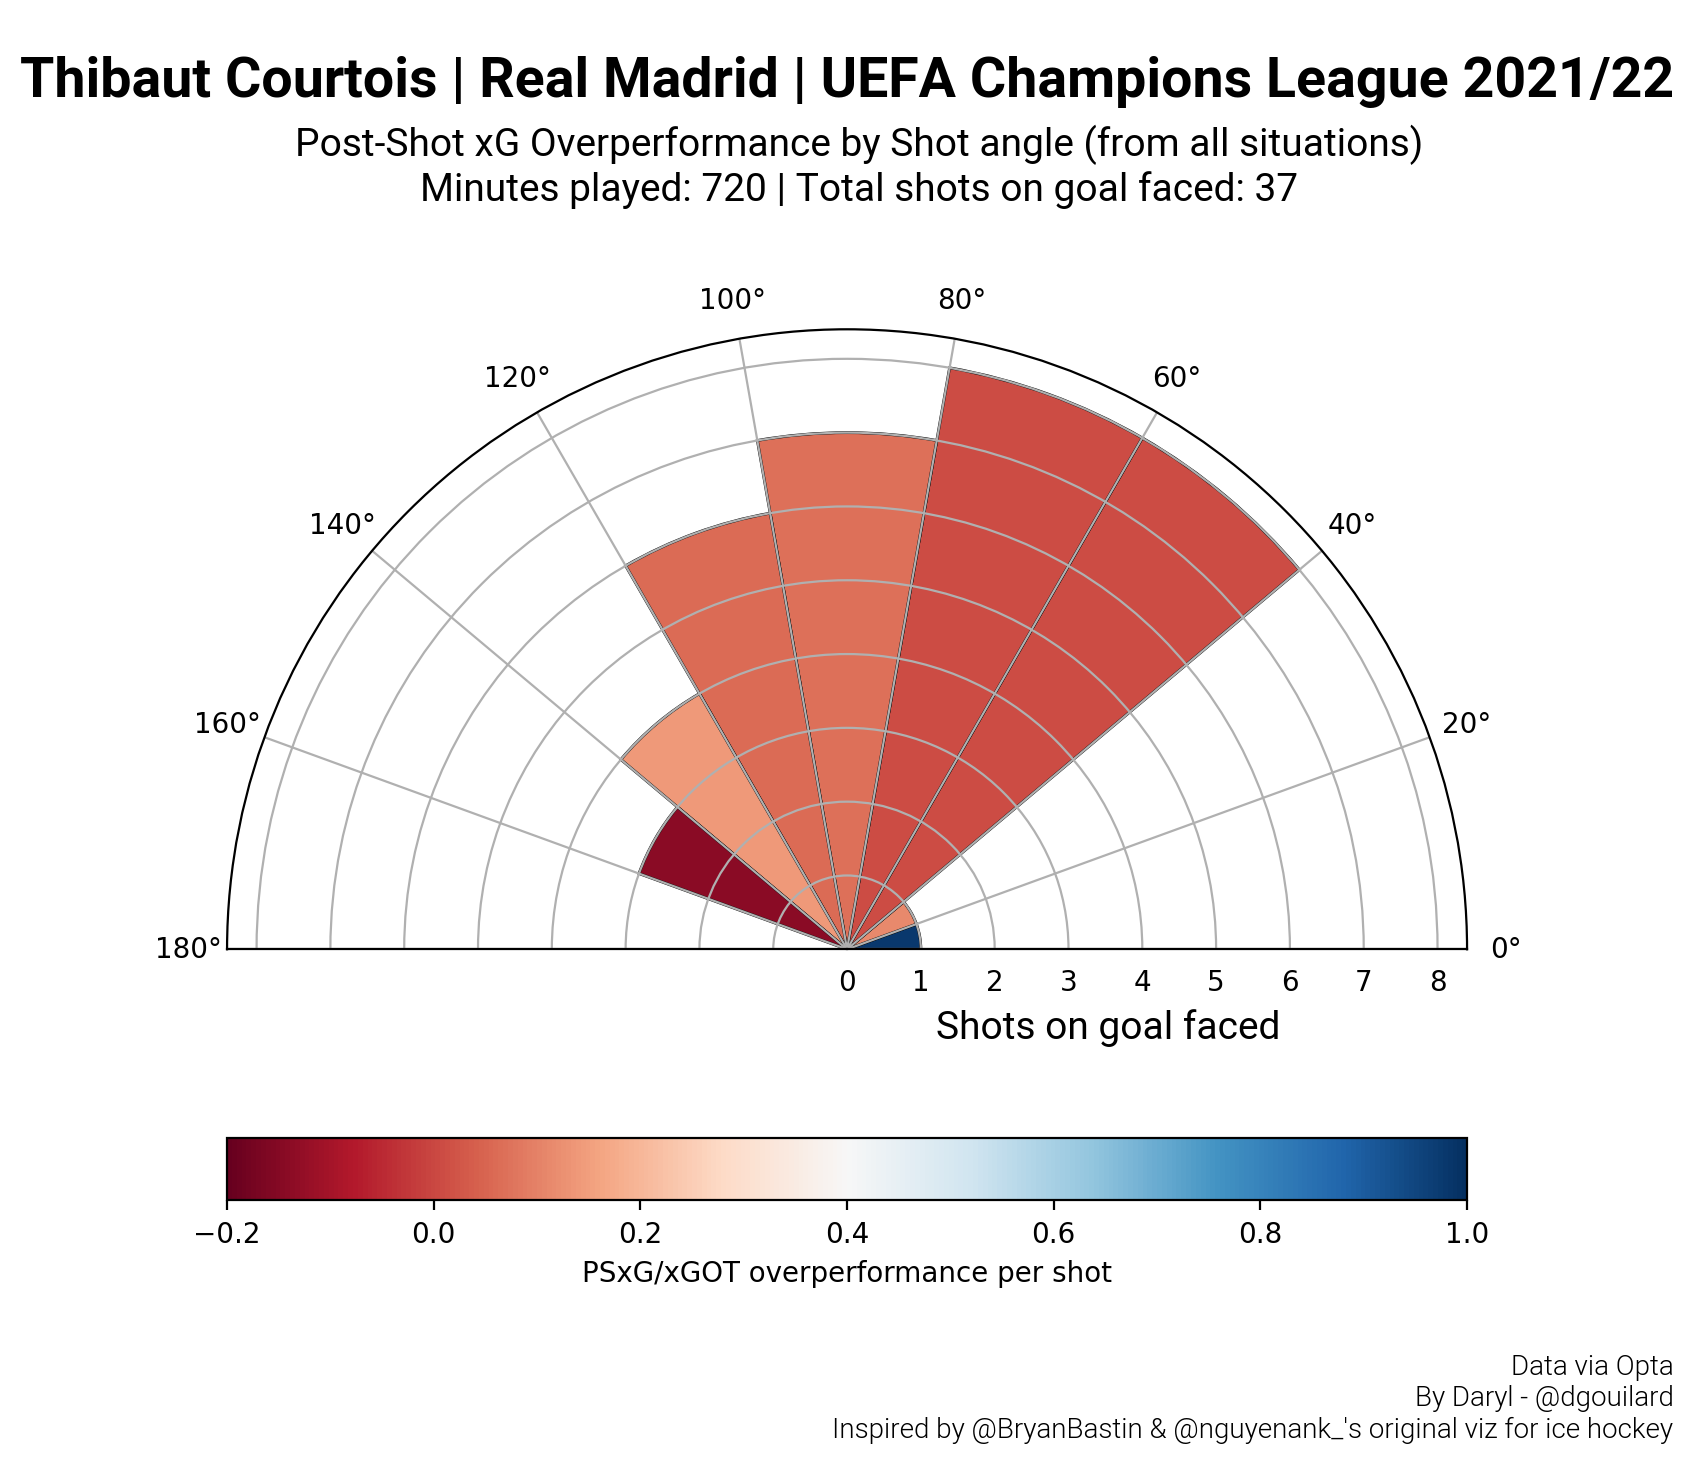

In [125]:
fig = plt.figure(figsize = (8, 10), facecolor = 'white')
ax = fig.add_subplot(111, facecolor = 'white', polar = True)

ax.set_xticks(np.arange(0, 2.0 * np.pi, np.pi / 9.0), fontproperties = robotoRegular)
ax.set_yticks(np.arange(0, 9, 1), fontproperties = robotoRegular)
ax.set_thetamin(0)
ax.set_thetamax(180)

# ax.bar(
    #     x = np.pi / 18, # trục giữa của cái quạt, tính theo radian. Vd ở đây trục ở góc pi/12 = 15 độ
    #     height = 1, # chiều cao
    #     width = np.pi / 9, # chiều rộng tính theo radian. Vd ở đây chiều rộng ở góc pi/6 = 30 độ
    #     bottom = 0,
    #     # color = colors
# )

norm = mpl.colors.Normalize(vmin = -0.2, vmax = 1)

for i in range(len(save_sonar)):
    
    theta = ((180 / 9) * save_sonar['division'][i] - 10) * np.pi / 180
    radii = save_sonar['saveTotal'][i] + save_sonar['shotConceded'][i]
    color = plt.cm.RdBu(norm(save_sonar['goalsPrevented'][i]))
    
    ax.bar(
        x = theta,
        height = radii,
        width = np.pi / 9,
        bottom = 0,
        facecolor = color,
        edgecolor = 'black'
    )
    
cbar = ax.figure.colorbar(
            mpl.cm.ScalarMappable(norm = norm, cmap = 'RdBu'),
            ax = ax, location = 'bottom', orientation = 'horizontal', spacing = 'uniform', fraction = .05, pad = -0.08)
cbar.ax.tick_params(color = "black", labelcolor = "black")
cbar.set_label('PSxG/xGOT overperformance per shot', color = 'black')

ax.text(5.5, 1.7, 'Shots on goal faced', fontproperties = robotoRegular, fontsize = 14)
plt.title(y = 0.95, label = 'Thibaut Courtois | Real Madrid | UEFA Champions League 2021/22', fontproperties = robotoBold, fontsize = 20, pad = -5.5)
plt.suptitle(x = 0.52, y = 0.67, 
             t = 'Post-Shot xG Overperformance by Shot angle (from all situations)\nMinutes played: 720 | Total shots on goal faced: 37', 
             fontproperties = robotoRegular, fontsize = 14)
plt.text(x = 5.75, y = 13, 
         s = "Data via Opta\nBy Daryl - @dgouilard\nInspired by @BryanBastin & @nguyenank_'s original viz for ice hockey", 
         fontproperties = robotoLight, fontsize = 10, ha = 'right')